#Import the required libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score


#*1. Load Data*

In [51]:
df = pd.read_csv('/content/Rotten_Tomatoes_Movies5.csv', encoding = 'latin-1', on_bad_lines = 'skip', quoting = 3)

#2. *Clean and prepare data*

In [52]:
df['tomatometer_rating'] = pd.to_numeric(df['tomatometer_rating'], errors='coerce')
df['runtime_in_minutes'] = pd.to_numeric(df['runtime_in_minutes'], errors='coerce')
df['tomatometer_count'] = pd.to_numeric(df['tomatometer_count'], errors='coerce')
df['audience_rating'] = pd.to_numeric(df['audience_rating'], errors='coerce')

#*3. Select Features*

In [53]:
features = ['tomatometer_rating']

 # *4. Remove rows with NaN values*

In [54]:
df_clean = df.dropna(subset = ['audience_rating'] + features)

#*5. Prepare data for Training*

In [55]:
X = df_clean[features]
Y = df_clean['audience_rating']

print("Total samples in dataset",len(df_clean))

Total samples in dataset 20


#*6. Train model on whole dataset*

In [56]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X,Y)

RandomForestClassifier(random_state=42)

#*7. Select 15 random samples for testing*

In [57]:
test_indices = np.random.choice(len(df_clean), 15, replace=False)
X_test = X.iloc[test_indices]
Y_test = Y.iloc[test_indices]

#*8. Make predictions on test samples*

In [58]:
Y_pred = model.predict(X_test)

#*9. Calculate accuracy*

In [59]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

#*10. Print results*

In [60]:
print('/n Model performance on 20 test samples:')
print(f'rmse: {rmse:2f}')
print(f'r2: {r2:2f}')

/n Model performance on 20 test samples:
rmse: 12.016655
r2: 0.735238


#*11. Visualize the results*

In [61]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Plot 1: Tomatometer vs Audience Rating Scatter Plot

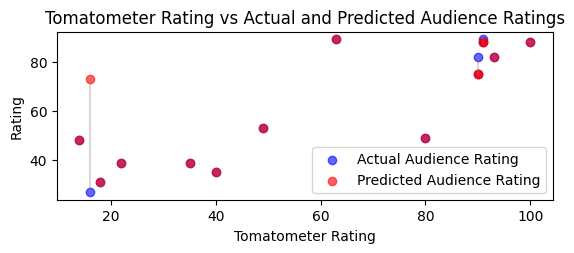

In [62]:
plt.subplot(2, 1, 1)
plt.scatter(X_test['tomatometer_rating'], Y_test, label='Actual Audience Rating', color='blue', alpha=0.6)
plt.scatter(X_test['tomatometer_rating'], Y_pred, label='Predicted Audience Rating', color='red', alpha=0.6)
for i in range(len(X_test)):
    plt.plot([X_test['tomatometer_rating'].iloc[i], X_test['tomatometer_rating'].iloc[i]],
             [Y_test.iloc[i], Y_pred[i]], 'gray', alpha=0.3)
plt.xlabel('Tomatometer Rating')
plt.ylabel('Rating')
plt.title('Tomatometer Rating vs Actual and Predicted Audience Ratings')
plt.legend()

# *Plot 2: Bar chart comparison*

In [71]:
indices = np.arange(15)
width = 0.35






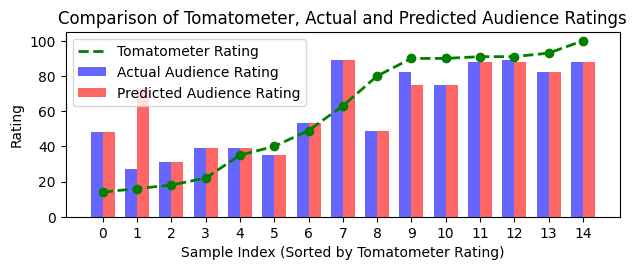

In [70]:
plt.subplot(2, 1, 2)

sort_idx = X_test['tomatometer_rating'].argsort()
tomatometer_sorted = X_test['tomatometer_rating'].iloc[sort_idx]
actual_sorted = Y_test.iloc[sort_idx]
pred_sorted = Y_pred[sort_idx]

plt.bar(indices - width/2, actual_sorted, width, label='Actual Audience Rating', color='blue', alpha=0.6)
plt.bar(indices + width/2, pred_sorted, width, label='Predicted Audience Rating', color='red', alpha=0.6)
plt.plot(indices, tomatometer_sorted, 'g--', label='Tomatometer Rating', linewidth=2)
plt.scatter(indices, tomatometer_sorted, color='green', zorder=5)

plt.xlabel('Sample Index (Sorted by Tomatometer Rating)')
plt.ylabel('Rating')
plt.title('Comparison of Tomatometer, Actual and Predicted Audience Ratings')
plt.legend()
plt.xticks(indices)
plt.tight_layout()
plt.show()

# *Print Detailed comparision*

In [66]:
print("\nDetailed Comparison (sorted by Tomatometer Rating):")
print("\nIndex | Tomatometer | Actual Audience | Predicted Audience | Difference")
print("-" * 70)
for i in range(15):
    tomatometer = tomatometer_sorted.iloc[i]
    actual = actual_sorted.iloc[i]
    pred = pred_sorted[i]
    diff = abs(actual-pred)
    print(f"{i:5d} | {tomatometer:11.2f} | {actual:14.2f} | {pred:17.2f} | {diff:10.2f}")


Detailed Comparison (sorted by Tomatometer Rating):

Index | Tomatometer | Actual Audience | Predicted Audience | Difference
----------------------------------------------------------------------
    0 |       14.00 |          48.00 |             48.00 |       0.00
    1 |       16.00 |          27.00 |             73.00 |      46.00
    2 |       18.00 |          31.00 |             31.00 |       0.00
    3 |       22.00 |          39.00 |             39.00 |       0.00
    4 |       35.00 |          39.00 |             39.00 |       0.00
    5 |       40.00 |          35.00 |             35.00 |       0.00
    6 |       49.00 |          53.00 |             53.00 |       0.00
    7 |       63.00 |          89.00 |             89.00 |       0.00
    8 |       80.00 |          49.00 |             49.00 |       0.00
    9 |       90.00 |          82.00 |             75.00 |       7.00
   10 |       90.00 |          75.00 |             75.00 |       0.00
   11 |       91.00 |          88

#*Calculate average errors*

In [72]:
mean_abs_error = np.mean(abs(Y_test - Y_pred))
mean_percent_error = np.mean(abs(Y_test - Y_pred)/Y_test * 100)
print(f"\nMean Absolute Error: {mean_abs_error:.2f}")
print(f"Mean Percentage Error: {mean_percent_error:.2f}%")
print(f"Prediction Accuracy: {100 - mean_percent_error:.2f}%")


Mean Absolute Error: 3.60
Mean Percentage Error: 12.00%
Prediction Accuracy: 88.00%


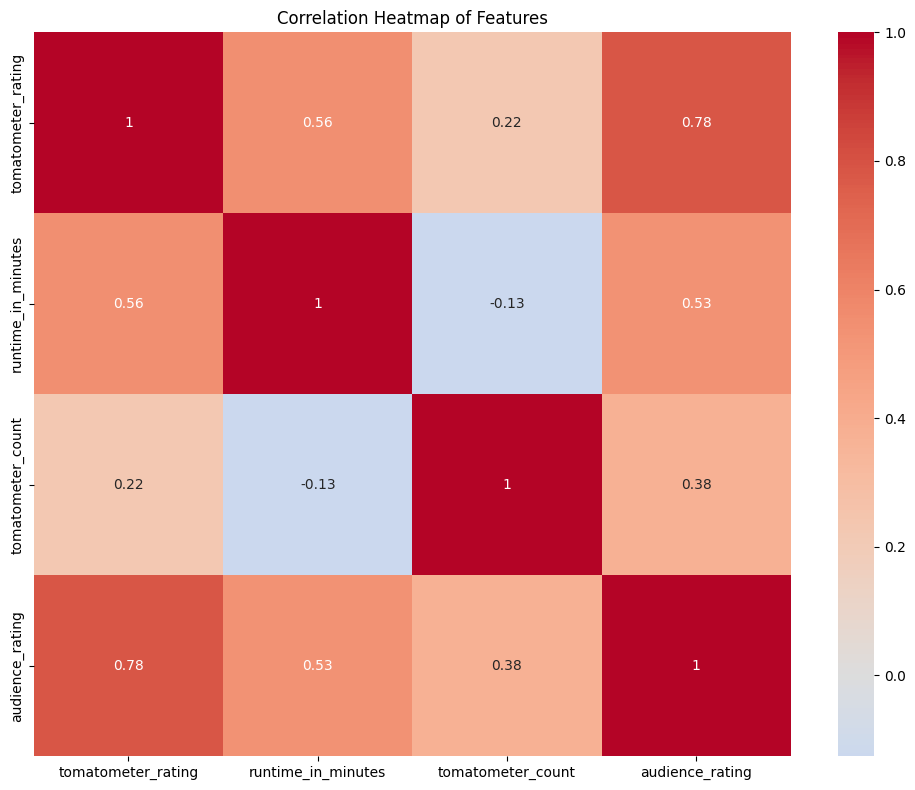

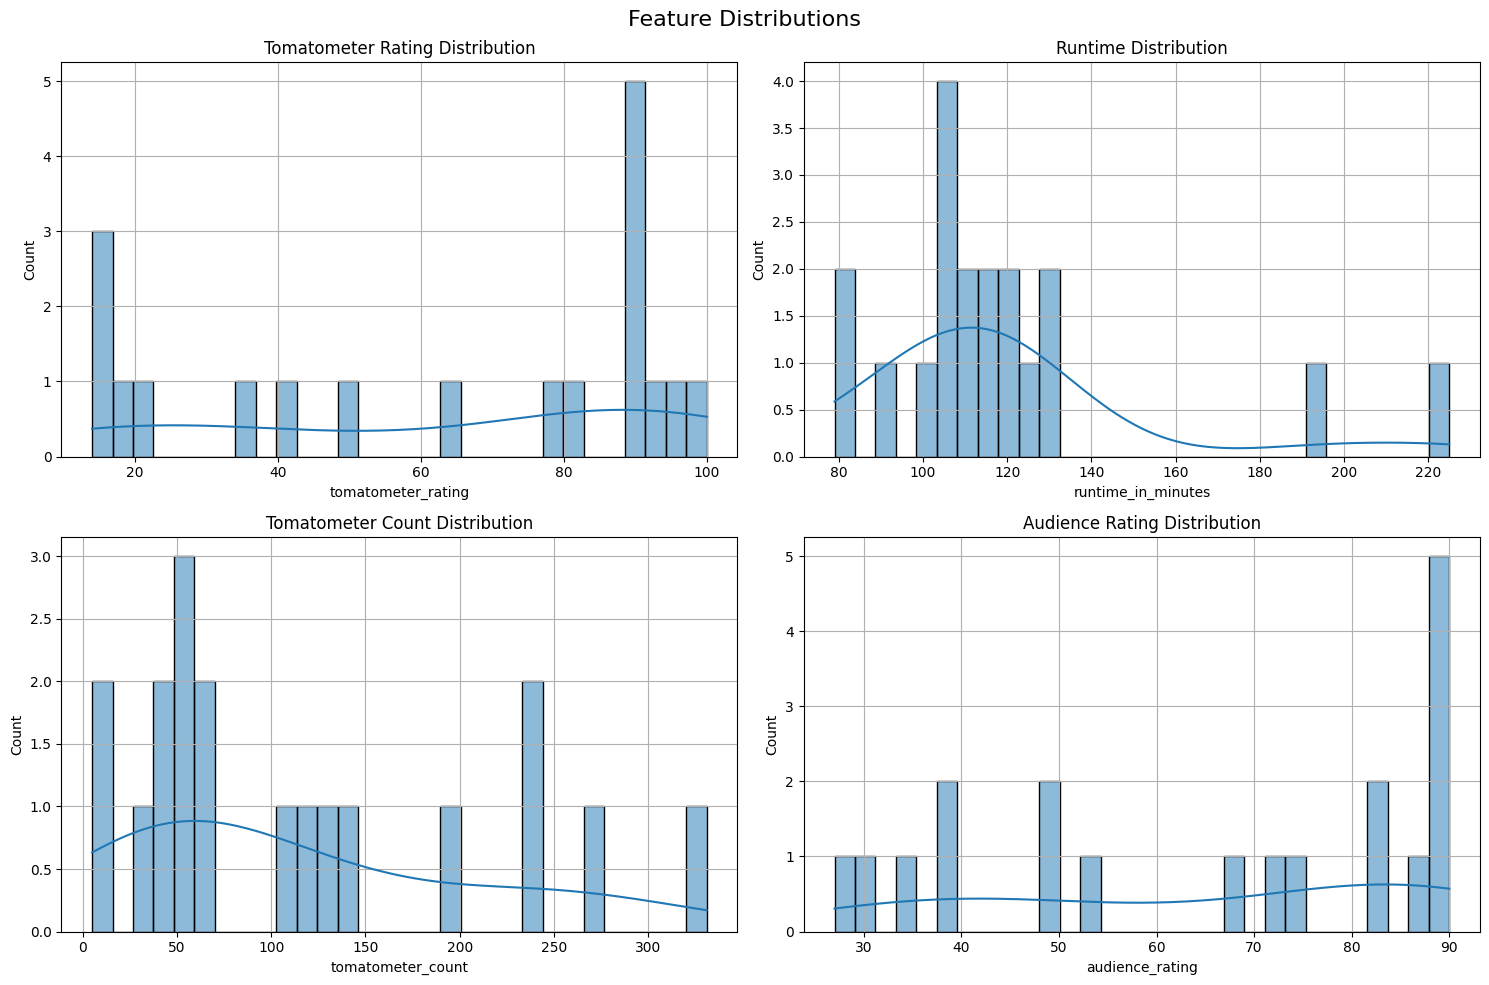

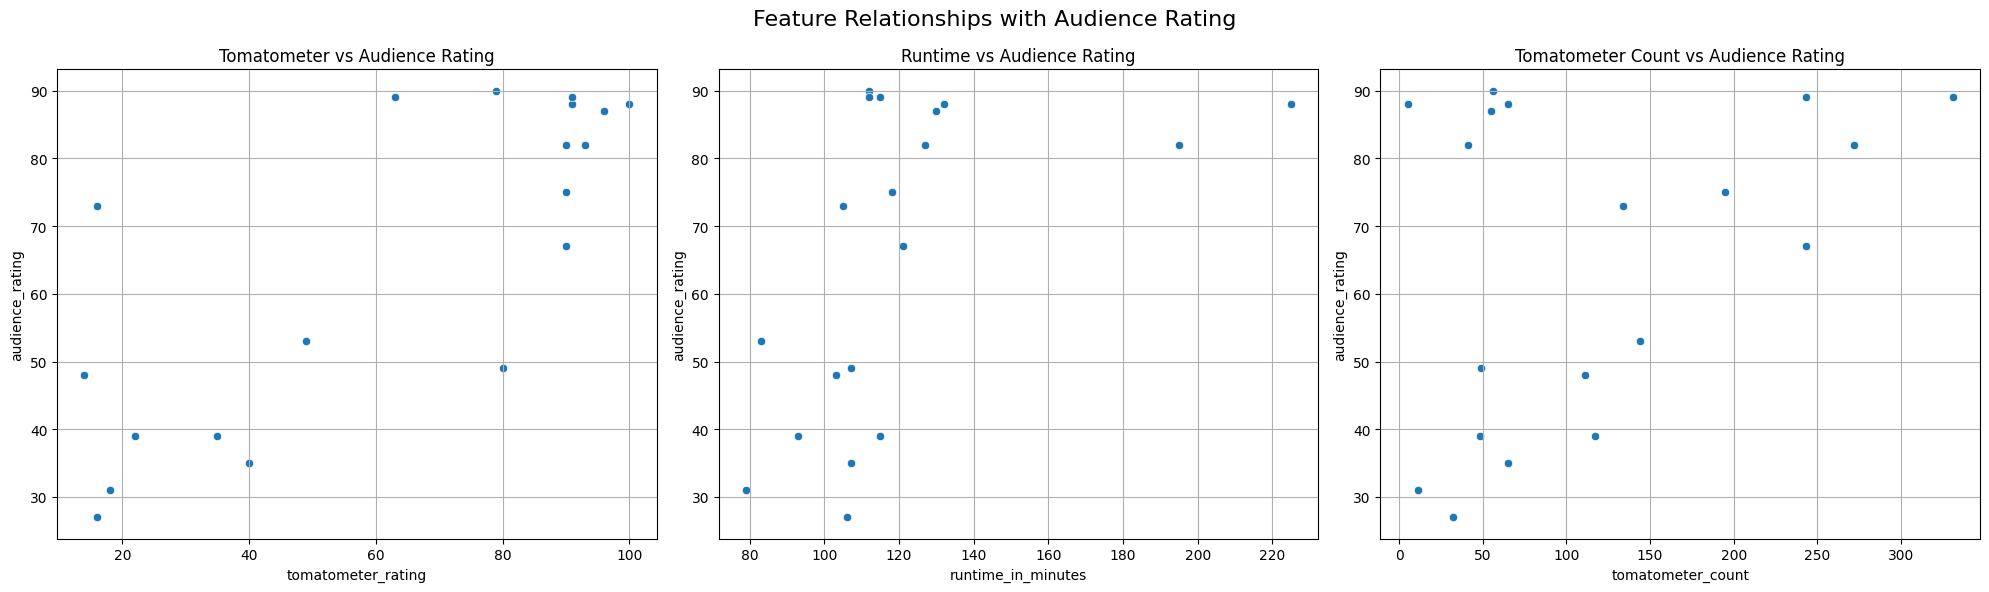

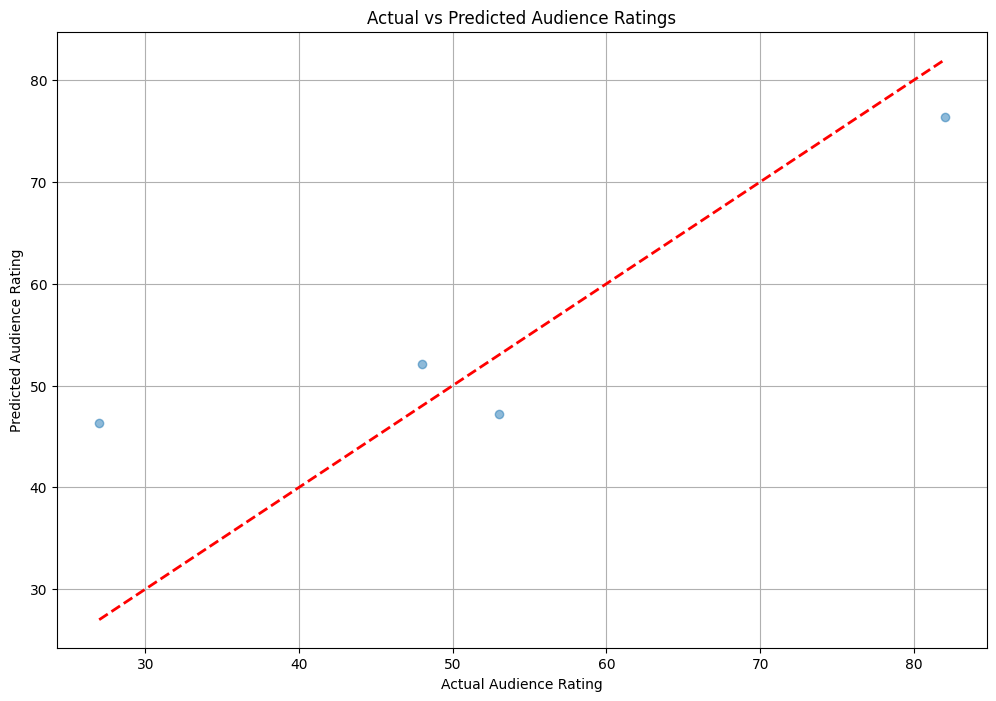

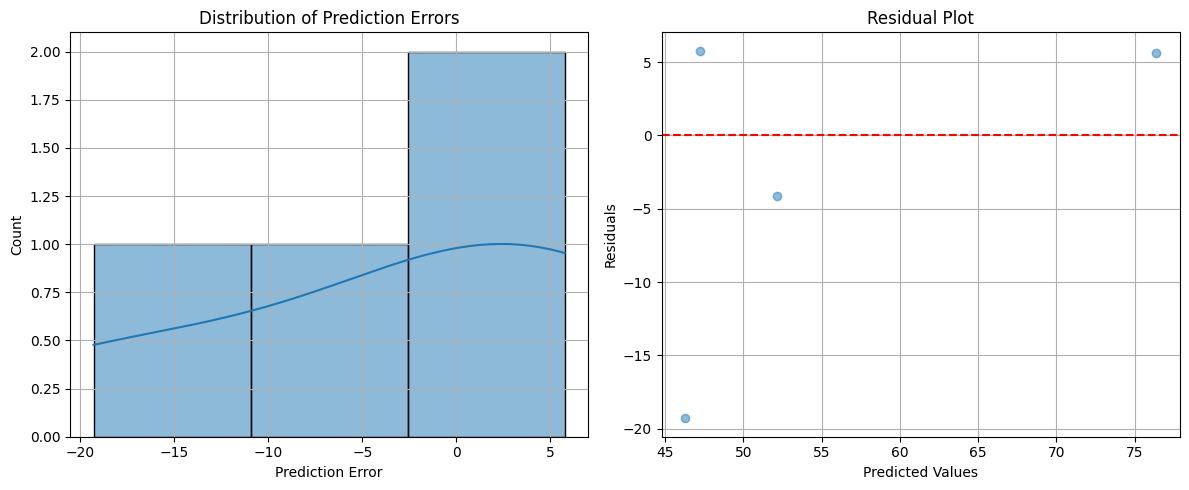

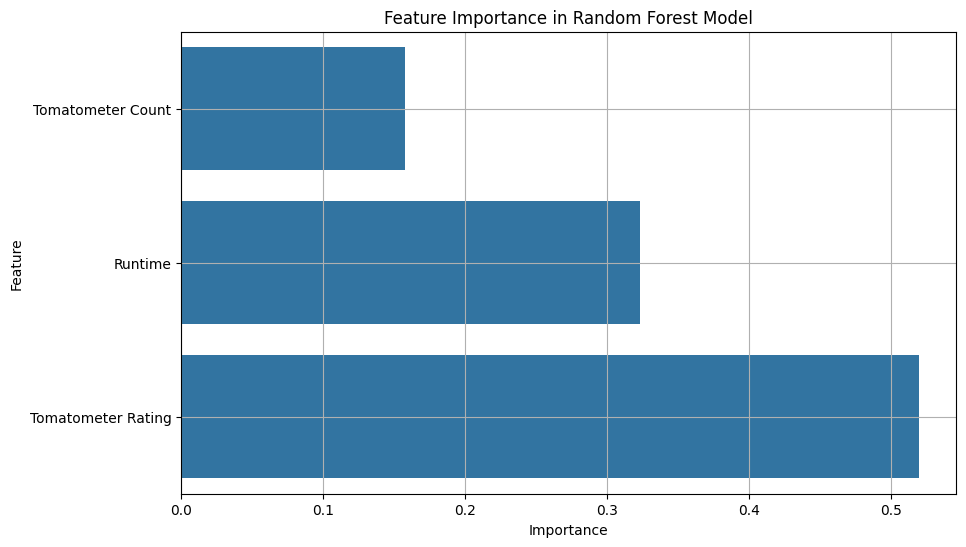

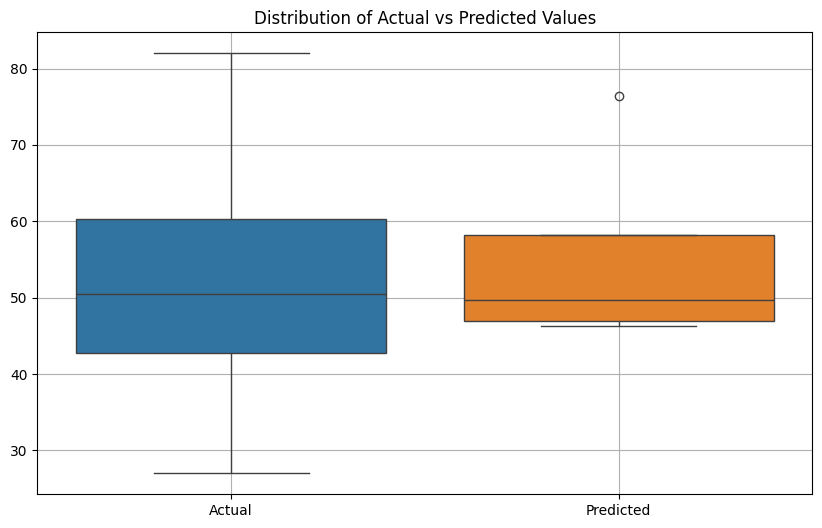

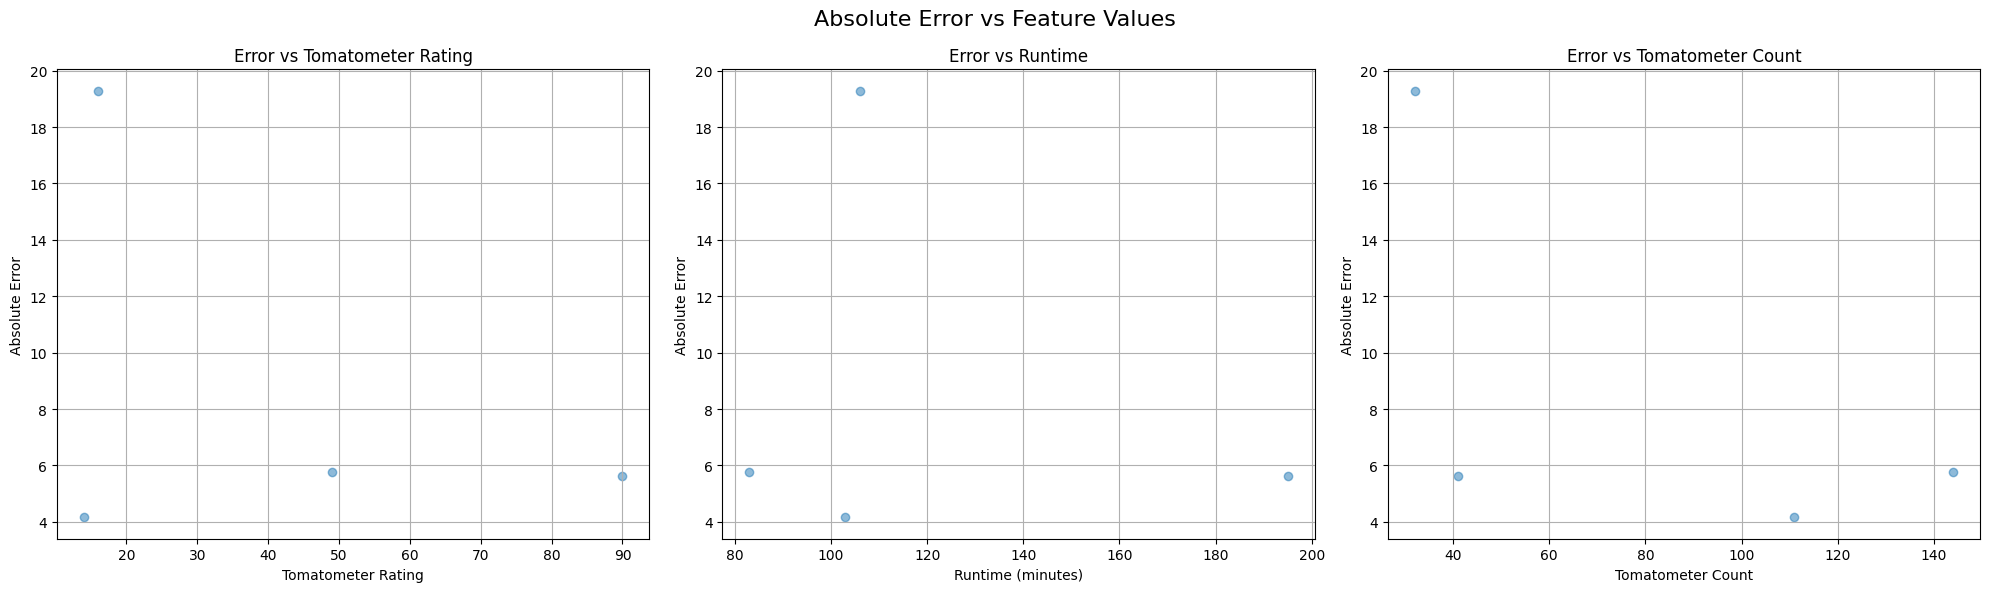

In [81]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Heatmap using selected columns directly
plt.figure(figsize=(10, 8))
correlation_columns = ['tomatometer_rating', 'runtime_in_minutes', 'tomatometer_count', 'audience_rating']
correlation = df_clean[correlation_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

# 2. Feature Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16)

sns.histplot(data=df_clean, x='tomatometer_rating', bins=30, ax=axes[0,0], kde=True)
axes[0,0].set_title('Tomatometer Rating Distribution')
axes[0,0].grid(True)

sns.histplot(data=df_clean, x='runtime_in_minutes', bins=30, ax=axes[0,1], kde=True)
axes[0,1].set_title('Runtime Distribution')
axes[0,1].grid(True)

sns.histplot(data=df_clean, x='tomatometer_count', bins=30, ax=axes[1,0], kde=True)
axes[1,0].set_title('Tomatometer Count Distribution')
axes[1,0].grid(True)

sns.histplot(data=df_clean, x='audience_rating', bins=30, ax=axes[1,1], kde=True)
axes[1,1].set_title('Audience Rating Distribution')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

# 3. Feature Relationships with Target
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Feature Relationships with Audience Rating', fontsize=16)

sns.scatterplot(data=df_clean, x='tomatometer_rating', y='audience_rating', ax=axes[0])
axes[0].set_title('Tomatometer vs Audience Rating')
axes[0].grid(True)

sns.scatterplot(data=df_clean, x='runtime_in_minutes', y='audience_rating', ax=axes[1])
axes[1].set_title('Runtime vs Audience Rating')
axes[1].grid(True)

sns.scatterplot(data=df_clean, x='tomatometer_count', y='audience_rating', ax=axes[2])
axes[2].set_title('Tomatometer Count vs Audience Rating')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# 4. Model Performance Visualization
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Ratings')
plt.grid(True)
plt.show()

# 5. Error Distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Feature Importance Plot
feature_importance = pd.DataFrame({
    'Feature': ['Tomatometer Rating', 'Runtime', 'Tomatometer Count'],
    'Importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Random Forest Model')
plt.grid(True)
plt.show()

# 7. Box Plot Comparison
plt.figure(figsize=(10, 6))
prediction_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
sns.boxplot(data=prediction_comparison)
plt.title('Distribution of Actual vs Predicted Values')
plt.grid(True)
plt.show()

# 8. Error Analysis by Feature Value
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Absolute Error vs Feature Values', fontsize=16)

axes[0].scatter(X_test['tomatometer_rating'], abs(errors), alpha=0.5)
axes[0].set_title('Error vs Tomatometer Rating')
axes[0].set_xlabel('Tomatometer Rating')
axes[0].set_ylabel('Absolute Error')
axes[0].grid(True)

axes[1].scatter(X_test['runtime_in_minutes'], abs(errors), alpha=0.5)
axes[1].set_title('Error vs Runtime')
axes[1].set_xlabel('Runtime (minutes)')
axes[1].set_ylabel('Absolute Error')
axes[1].grid(True)

axes[2].scatter(X_test['tomatometer_count'], abs(errors), alpha=0.5)
axes[2].set_title('Error vs Tomatometer Count')
axes[2].set_xlabel('Tomatometer Count')
axes[2].set_ylabel('Absolute Error')
axes[2].grid(True)

plt.tight_layout()
plt.show()

1. Data Loading and Exploration
--------------------------------------------------
Initial dataset shape: (16282, 16)

2. Data Preprocessing
--------------------------------------------------
Clean dataset shape: (19, 16)

3. Initial Data Analysis
--------------------------------------------------


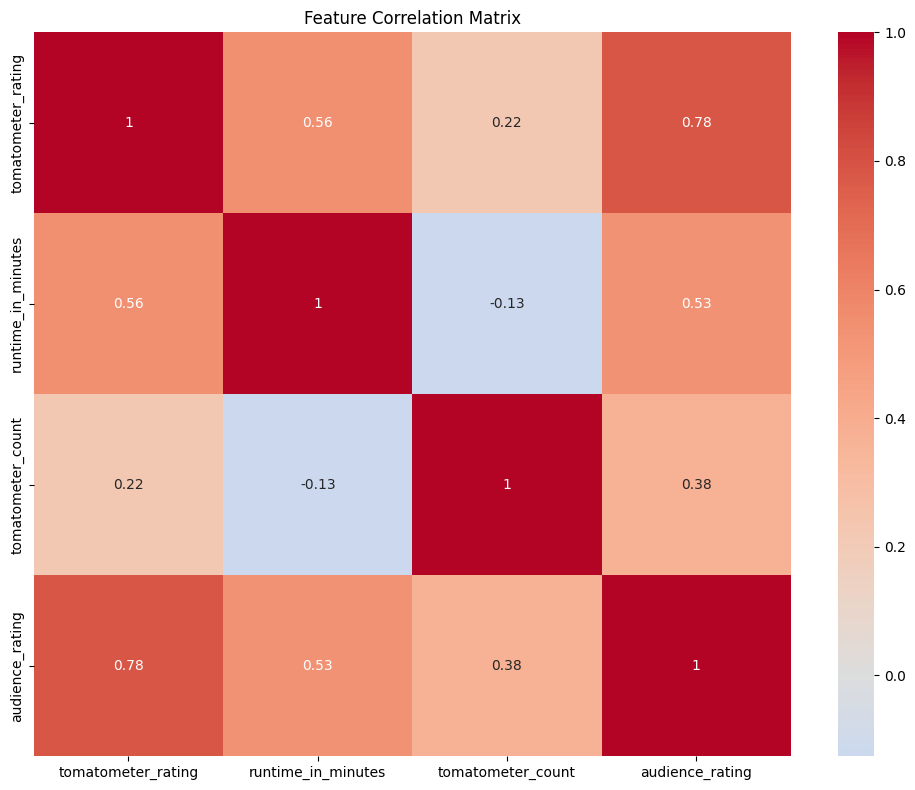


Correlations with Audience Rating:
audience_rating       1.000000
tomatometer_rating    0.781082
runtime_in_minutes    0.533382
tomatometer_count     0.375140
Name: audience_rating, dtype: float64

Training set size: 15
Testing set size: 4

4. Baseline Model Performance
--------------------------------------------------
Baseline Model RMSE: 25.05
Baseline Model R2 Score: -0.63

5. Random Forest Model Development
--------------------------------------------------
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

6. Model Performance Metrics
--------------------------------------------------
Root Mean Squared Error: 9.29
Mean Absolute Error: 7.22
R² Score: 0.78

Cross-validation R² scores: [  0.21915887   0.89257658   0.10004989   0.61442929 -11.40187248]
Average CV R² Score: -1.92 (+/- 9.50)

Feature Importance:
              Feature  Importance
0  tomatometer_rating    0.581159
1  runtime_in_minutes    0.300710
2   tomatometer_co

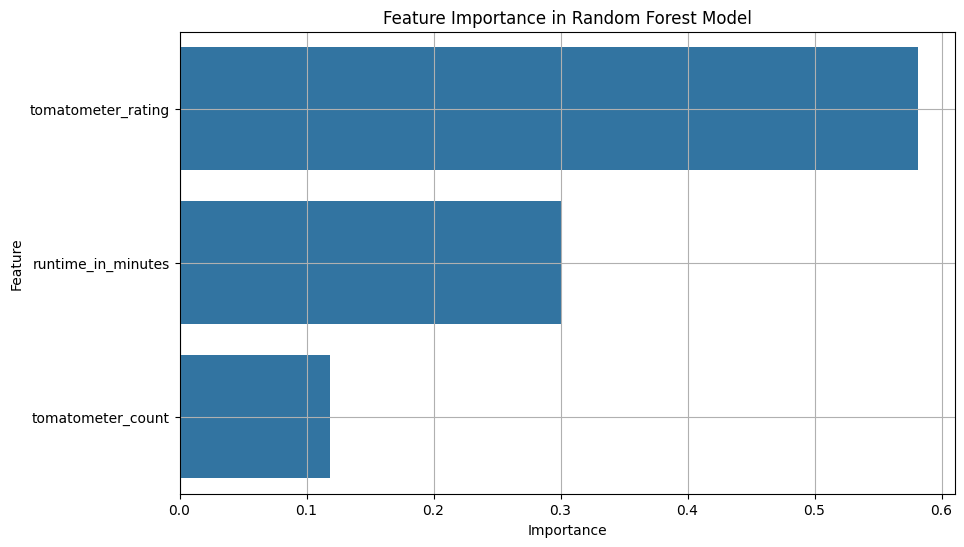

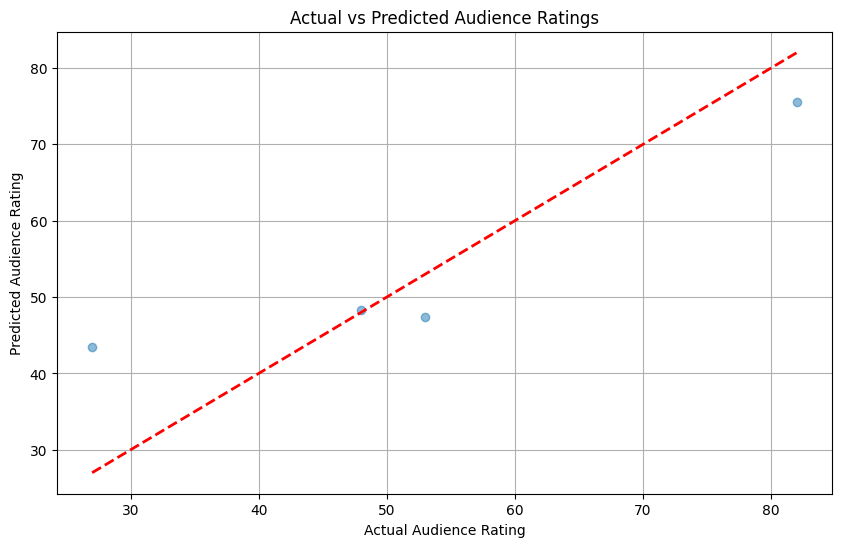

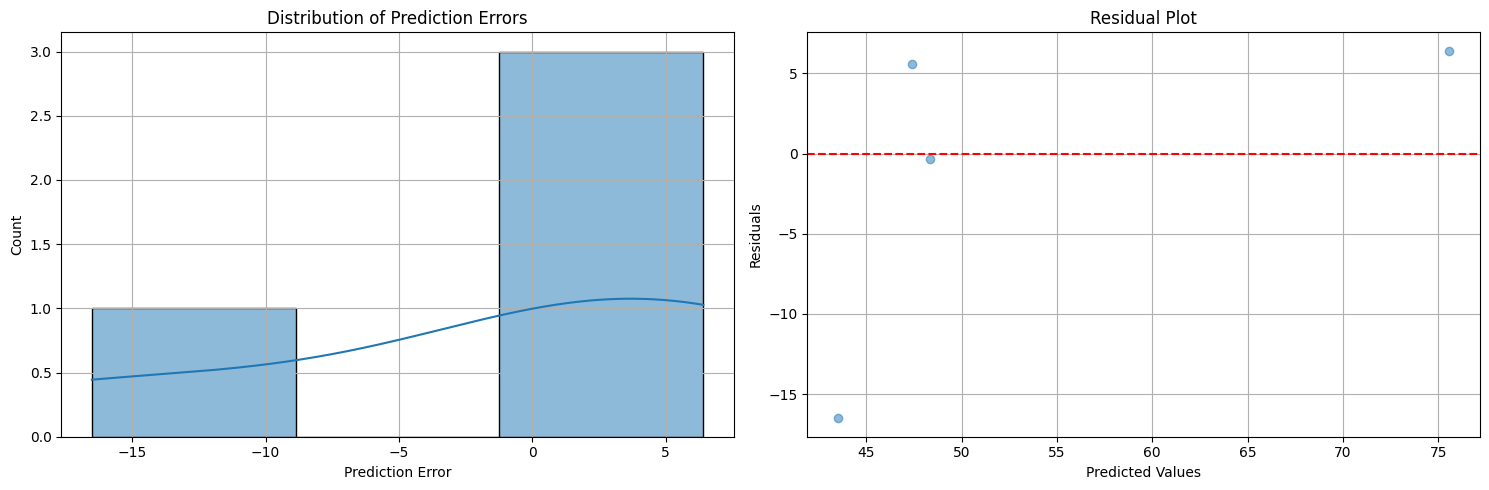

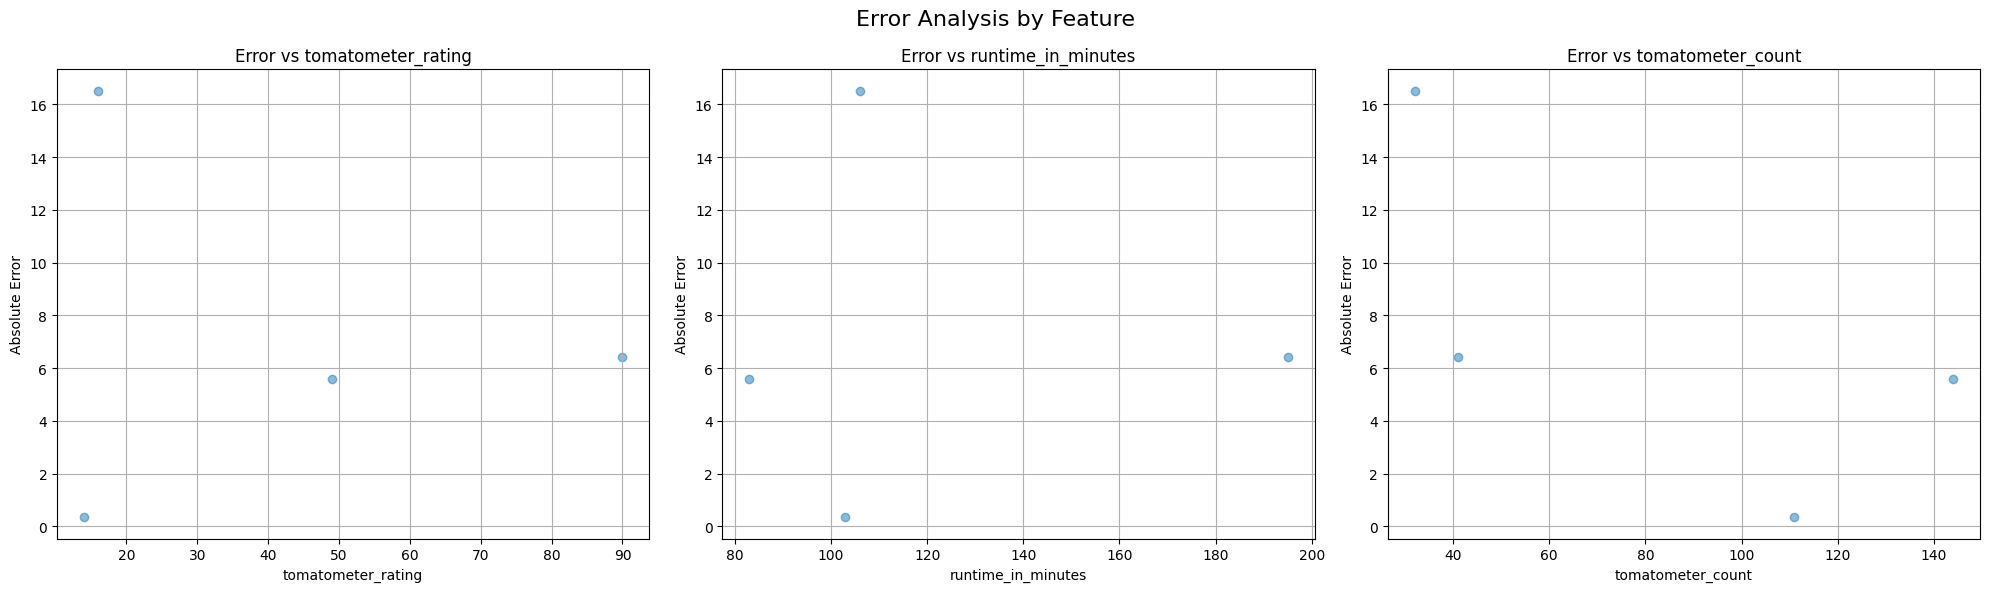


8. Model Performance Summary
--------------------------------------------------
Baseline RMSE: 25.05
Final Model RMSE: 9.29
Improvement over baseline: 62.91%

Model Validation:
- R² Score: 0.78
- Cross-validation R² Score: -1.92 (+/- 9.50)
- Mean Absolute Error: 7.22

Top Features by Importance:
- tomatometer_rating: 0.581
- runtime_in_minutes: 0.301
- tomatometer_count: 0.118


In [82]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Explore Data
print("1. Data Loading and Exploration")
print("-" * 50)
df = pd.read_csv('Rotten_Tomatoes_Movies5.csv', encoding='latin-1', on_bad_lines='skip', quoting=3)
print(f"Initial dataset shape: {df.shape}")

# 2. Data Preprocessing
print("\n2. Data Preprocessing")
print("-" * 50)

# Convert columns to numeric
numeric_columns = ['tomatometer_rating', 'runtime_in_minutes', 'tomatometer_count', 'audience_rating']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows with NaN values
df_clean = df.dropna(subset=numeric_columns)
print(f"Clean dataset shape: {df_clean.shape}")

# 3. Data Analysis
print("\n3. Initial Data Analysis")
print("-" * 50)

# Correlation Analysis
correlation = df_clean[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Feature correlations with target
correlation_with_target = df_clean[numeric_columns].corr()['audience_rating'].sort_values(ascending=False)
print("\nCorrelations with Audience Rating:")
print(correlation_with_target)

# 4. Feature Selection and Data Preparation
features = ['tomatometer_rating', 'runtime_in_minutes', 'tomatometer_count']
X = df_clean[features]
y = df_clean['audience_rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# 5. Baseline Model
print("\n4. Baseline Model Performance")
print("-" * 50)
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_r2 = r2_score(y_test, baseline_pred)
print(f"Baseline Model RMSE: {baseline_rmse:.2f}")
print(f"Baseline Model R2 Score: {baseline_r2:.2f}")

# 6. Model Development and Tuning
print("\n5. Random Forest Model Development")
print("-" * 50)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# 7. Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n6. Model Performance Metrics")
print("-" * 50)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores}")
print(f"Average CV R² Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# 8. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# 9. Visualizations
print("\n7. Generating Visualizations")
print("-" * 50)

# Plot 1: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Random Forest Model')
plt.grid(True)
plt.show()

# Plot 2: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Ratings')
plt.grid(True)
plt.show()

# Plot 3: Error Analysis
plt.figure(figsize=(15, 5))
errors = y_test - y_pred

# Error Distribution
plt.subplot(1, 2, 1)
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.grid(True)

# Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Error Analysis by Feature
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Error Analysis by Feature', fontsize=16)

for i, feature in enumerate(features):
    axes[i].scatter(X_test[feature], abs(errors), alpha=0.5)
    axes[i].set_title(f'Error vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Absolute Error')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 11. Model Performance Summary
print("\n8. Model Performance Summary")
print("-" * 50)
print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Final Model RMSE: {rmse:.2f}")
print(f"Improvement over baseline: {((baseline_rmse - rmse)/baseline_rmse * 100):.2f}%")
print("\nModel Validation:")
print(f"- R² Score: {r2:.2f}")
print(f"- Cross-validation R² Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
print(f"- Mean Absolute Error: {mae:.2f}")

# Most important features
print("\nTop Features by Importance:")
for _, row in feature_importance.iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.3f}")

1. Data Loading and Exploration
--------------------------------------------------
Initial dataset shape: (16282, 16)

2. Data Preprocessing
--------------------------------------------------
Clean dataset shape: (19, 16)

3. Initial Data Analysis
--------------------------------------------------


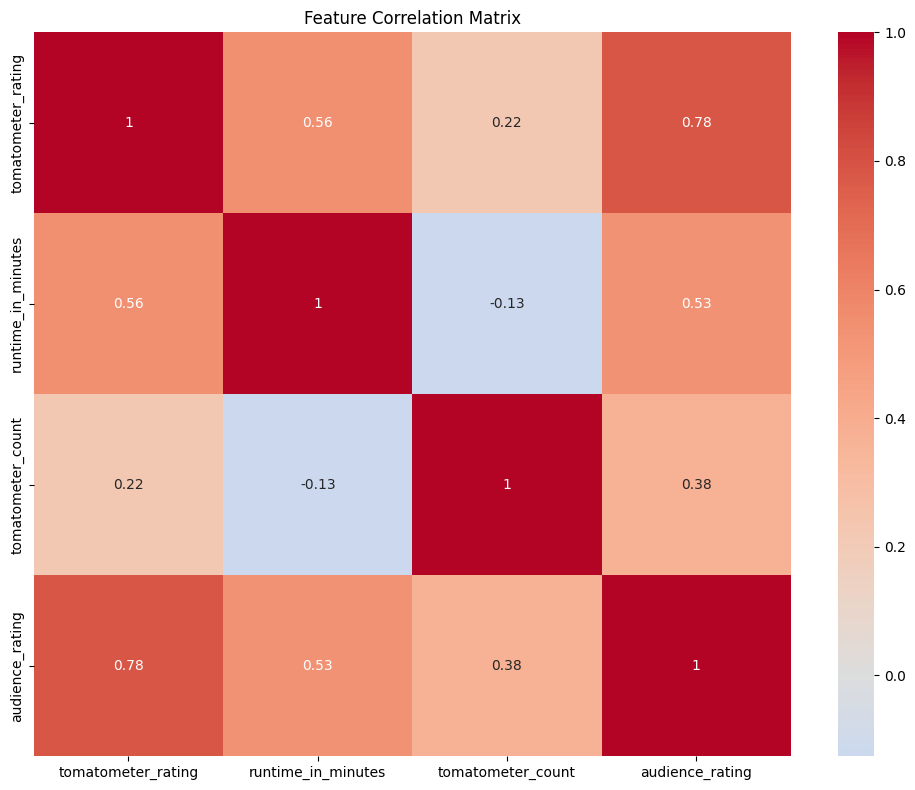


Correlations with Audience Rating:
audience_rating       1.000000
tomatometer_rating    0.781082
runtime_in_minutes    0.533382
tomatometer_count     0.375140
Name: audience_rating, dtype: float64

Training set size: 15
Testing set size: 4

4. Baseline Model Performance
--------------------------------------------------
Baseline Model RMSE: 25.05
Baseline Model R2 Score: -0.63

5. Random Forest Model Development
--------------------------------------------------
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

6. Model Performance Metrics
--------------------------------------------------

Model Accuracy Scores:
Accuracy (within 0.5 rating points): 25.00%
Accuracy (within 1.0 rating points): 25.00%
Accuracy (within 1.5 rating points): 25.00%

Other Performance Metrics:
Root Mean Squared Error: 9.29
Mean Absolute Error: 7.22
R² Score: 0.78

Mean Absolute Percentage Error: 20.07%
Overall Prediction Accuracy: 79.93%

Cross-validati

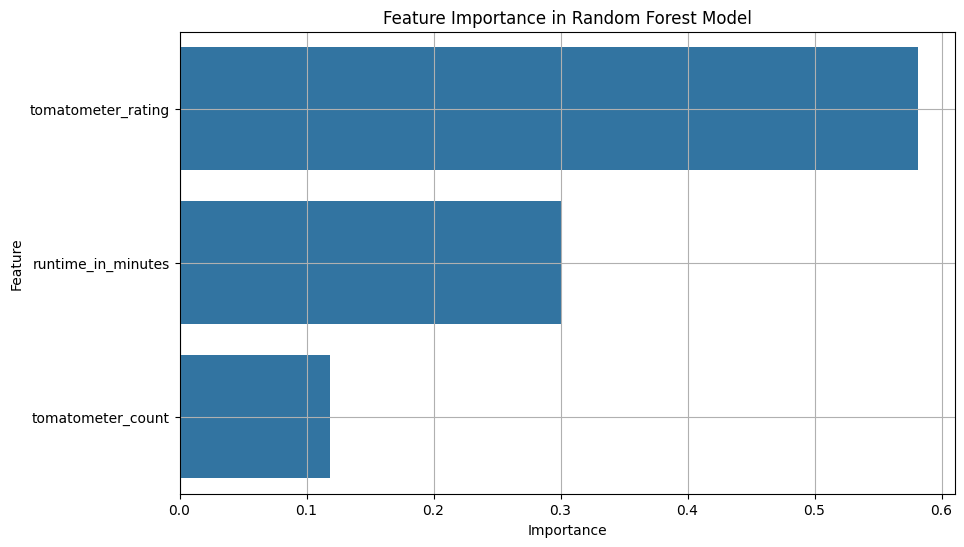

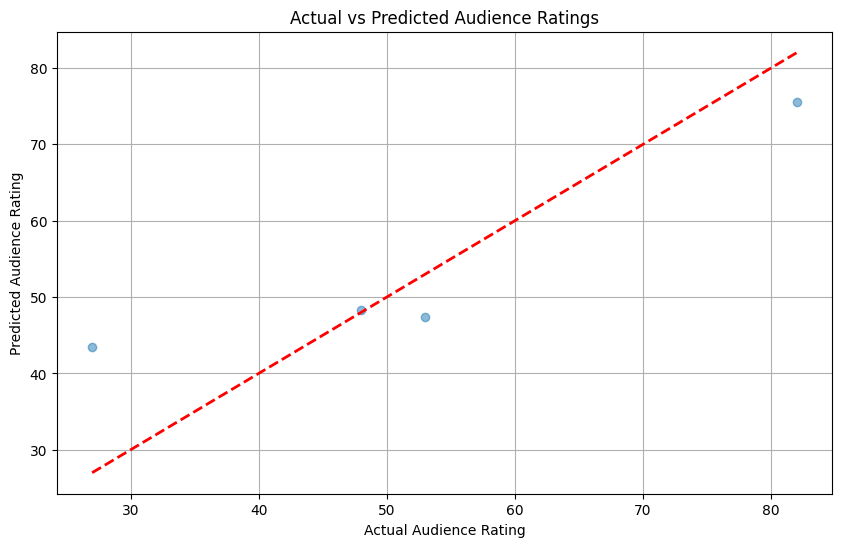

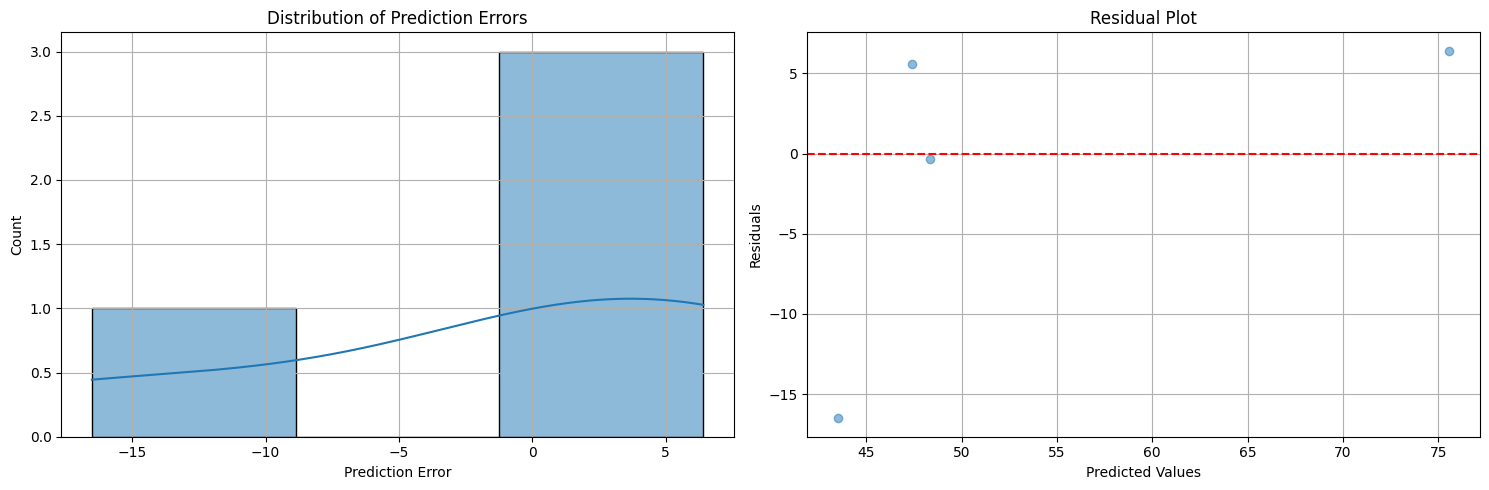

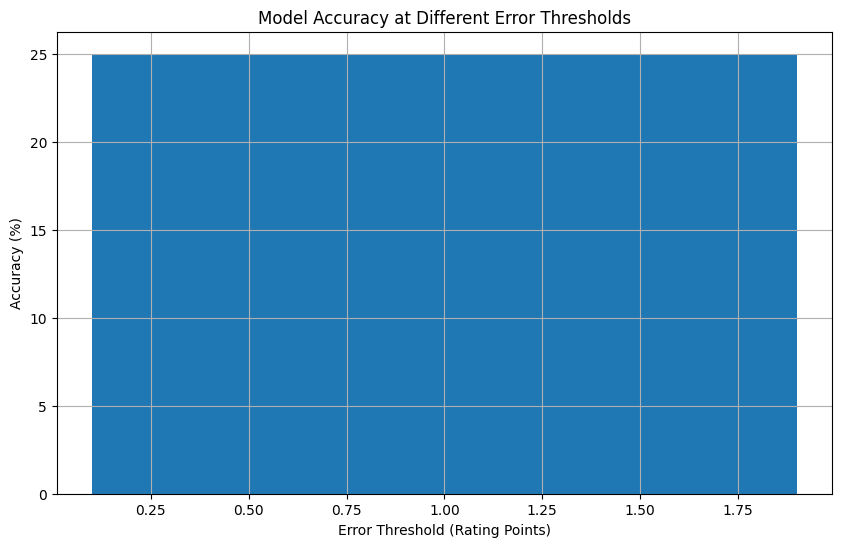

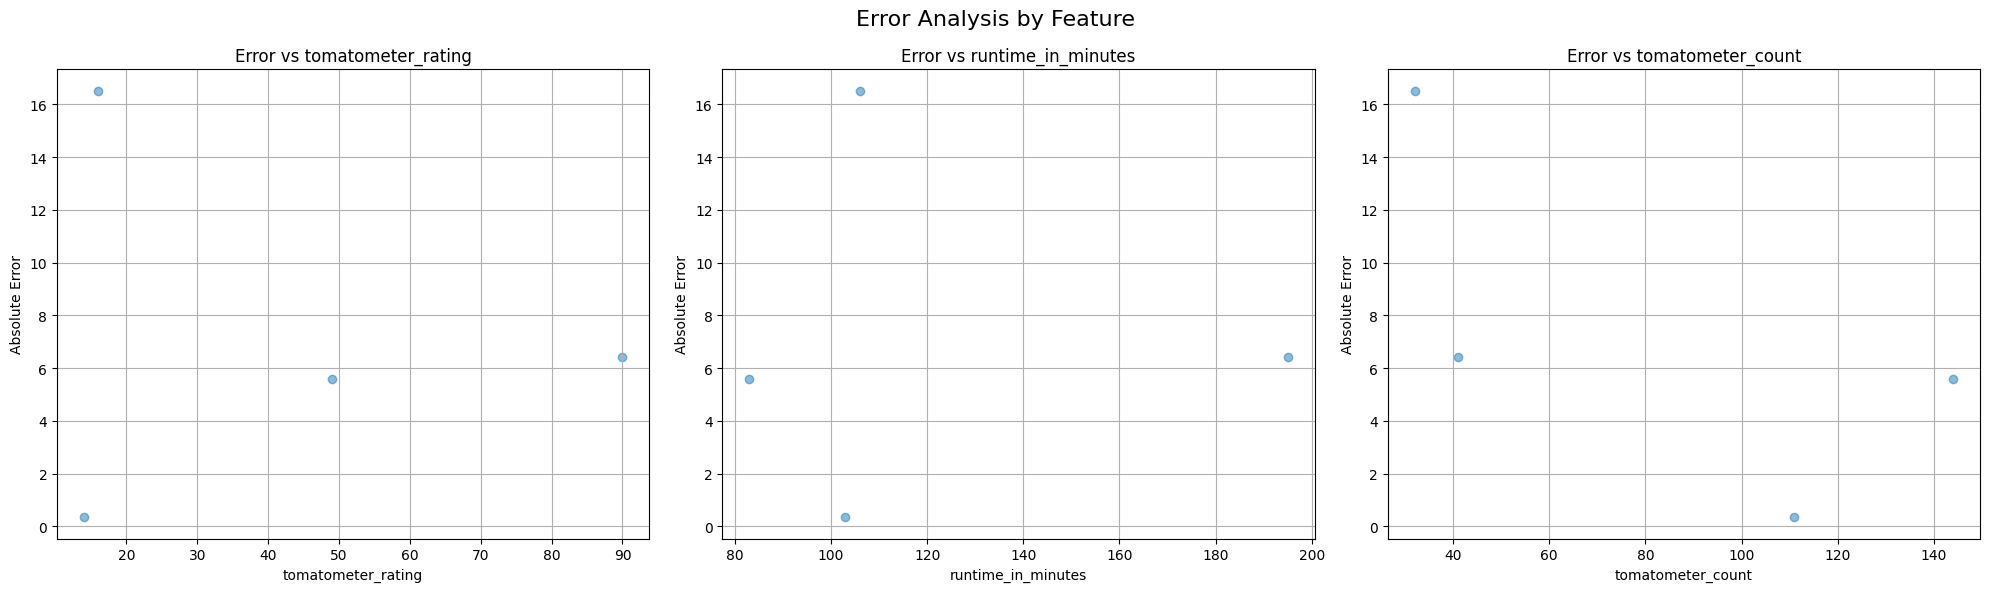


8. Model Performance Summary
--------------------------------------------------
Baseline RMSE: 25.05
Final Model RMSE: 9.29
Improvement over baseline: 62.91%

Accuracy Metrics:
- Overall Prediction Accuracy: 79.93%
- Accuracy within 0.5 points: 25.00%
- Accuracy within 1.0 points: 25.00%
- Accuracy within 1.5 points: 25.00%

Model Validation:
- R² Score: 0.78
- Cross-validation R² Score: -1.92 (+/- 9.50)
- Mean Absolute Error: 7.22

Top Features by Importance:
- tomatometer_rating: 0.581
- runtime_in_minutes: 0.301
- tomatometer_count: 0.118


In [83]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Explore Data
print("1. Data Loading and Exploration")
print("-" * 50)
df = pd.read_csv('Rotten_Tomatoes_Movies5.csv', encoding='latin-1', on_bad_lines='skip', quoting=3)
print(f"Initial dataset shape: {df.shape}")

# 2. Data Preprocessing
print("\n2. Data Preprocessing")
print("-" * 50)

# Convert columns to numeric
numeric_columns = ['tomatometer_rating', 'runtime_in_minutes', 'tomatometer_count', 'audience_rating']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows with NaN values
df_clean = df.dropna(subset=numeric_columns)
print(f"Clean dataset shape: {df_clean.shape}")

# 3. Data Analysis
print("\n3. Initial Data Analysis")
print("-" * 50)

# Correlation Analysis
correlation = df_clean[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Feature correlations with target
correlation_with_target = df_clean[numeric_columns].corr()['audience_rating'].sort_values(ascending=False)
print("\nCorrelations with Audience Rating:")
print(correlation_with_target)

# 4. Feature Selection and Data Preparation
features = ['tomatometer_rating', 'runtime_in_minutes', 'tomatometer_count']
X = df_clean[features]
y = df_clean['audience_rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# 5. Baseline Model
print("\n4. Baseline Model Performance")
print("-" * 50)
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))
baseline_r2 = r2_score(y_test, baseline_pred)
print(f"Baseline Model RMSE: {baseline_rmse:.2f}")
print(f"Baseline Model R2 Score: {baseline_r2:.2f}")

# 6. Model Development and Tuning
print("\n5. Random Forest Model Development")
print("-" * 50)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# 7. Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n6. Model Performance Metrics")
print("-" * 50)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Calculate accuracy scores
def calculate_accuracy_scores(y_true, y_pred, thresholds=[0.5, 1.0, 1.5]):
    accuracy_scores = {}
    for threshold in thresholds:
        within_threshold = np.abs(y_true - y_pred) <= threshold
        accuracy = np.mean(within_threshold) * 100
        accuracy_scores[threshold] = accuracy
    return accuracy_scores

accuracy_scores = calculate_accuracy_scores(y_test, y_pred)

print("\nModel Accuracy Scores:")
print(f"Accuracy (within 0.5 rating points): {accuracy_scores[0.5]:.2f}%")
print(f"Accuracy (within 1.0 rating points): {accuracy_scores[1.0]:.2f}%")
print(f"Accuracy (within 1.5 rating points): {accuracy_scores[1.5]:.2f}%")

print("\nOther Performance Metrics:")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Calculate percentage error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print(f"\nMean Absolute Percentage Error: {mape:.2f}%")
print(f"Overall Prediction Accuracy: {accuracy:.2f}%")

# Cross-validation scores
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R² scores: {cv_scores}")
print(f"Average CV R² Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# 8. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# 9. Visualizations
print("\n7. Generating Visualizations")
print("-" * 50)

# Plot 1: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Random Forest Model')
plt.grid(True)
plt.show()

# Plot 2: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Audience Rating')
plt.ylabel('Predicted Audience Rating')
plt.title('Actual vs Predicted Audience Ratings')
plt.grid(True)
plt.show()

# Plot 3: Error Analysis
plt.figure(figsize=(15, 5))
errors = y_test - y_pred

# Error Distribution
plt.subplot(1, 2, 1)
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.grid(True)

# Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred, errors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 4: Accuracy by Threshold
plt.figure(figsize=(10, 6))
thresholds = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())
plt.bar(thresholds, accuracies)
plt.xlabel('Error Threshold (Rating Points)')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy at Different Error Thresholds')
plt.grid(True)
plt.show()

# Plot 5: Error Analysis by Feature
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Error Analysis by Feature', fontsize=16)

for i, feature in enumerate(features):
    axes[i].scatter(X_test[feature], abs(errors), alpha=0.5)
    axes[i].set_title(f'Error vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Absolute Error')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 10. Model Performance Summary
print("\n8. Model Performance Summary")
print("-" * 50)
print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Final Model RMSE: {rmse:.2f}")
print(f"Improvement over baseline: {((baseline_rmse - rmse)/baseline_rmse * 100):.2f}%")
print("\nAccuracy Metrics:")
print(f"- Overall Prediction Accuracy: {accuracy:.2f}%")
print(f"- Accuracy within 0.5 points: {accuracy_scores[0.5]:.2f}%")
print(f"- Accuracy within 1.0 points: {accuracy_scores[1.0]:.2f}%")
print(f"- Accuracy within 1.5 points: {accuracy_scores[1.5]:.2f}%")
print("\nModel Validation:")
print(f"- R² Score: {r2:.2f}")
print(f"- Cross-validation R² Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")
print(f"- Mean Absolute Error: {mae:.2f}")

print("\nTop Features by Importance:")
for _, row in feature_importance.iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.3f}")

Initial dataset shape: (16282, 16)
Clean dataset shape:(20, 16)
Total samples in dataset: 20

Model Performance on 15 Test Samples:
RMSE: 10.15
R2 Score: 0.75


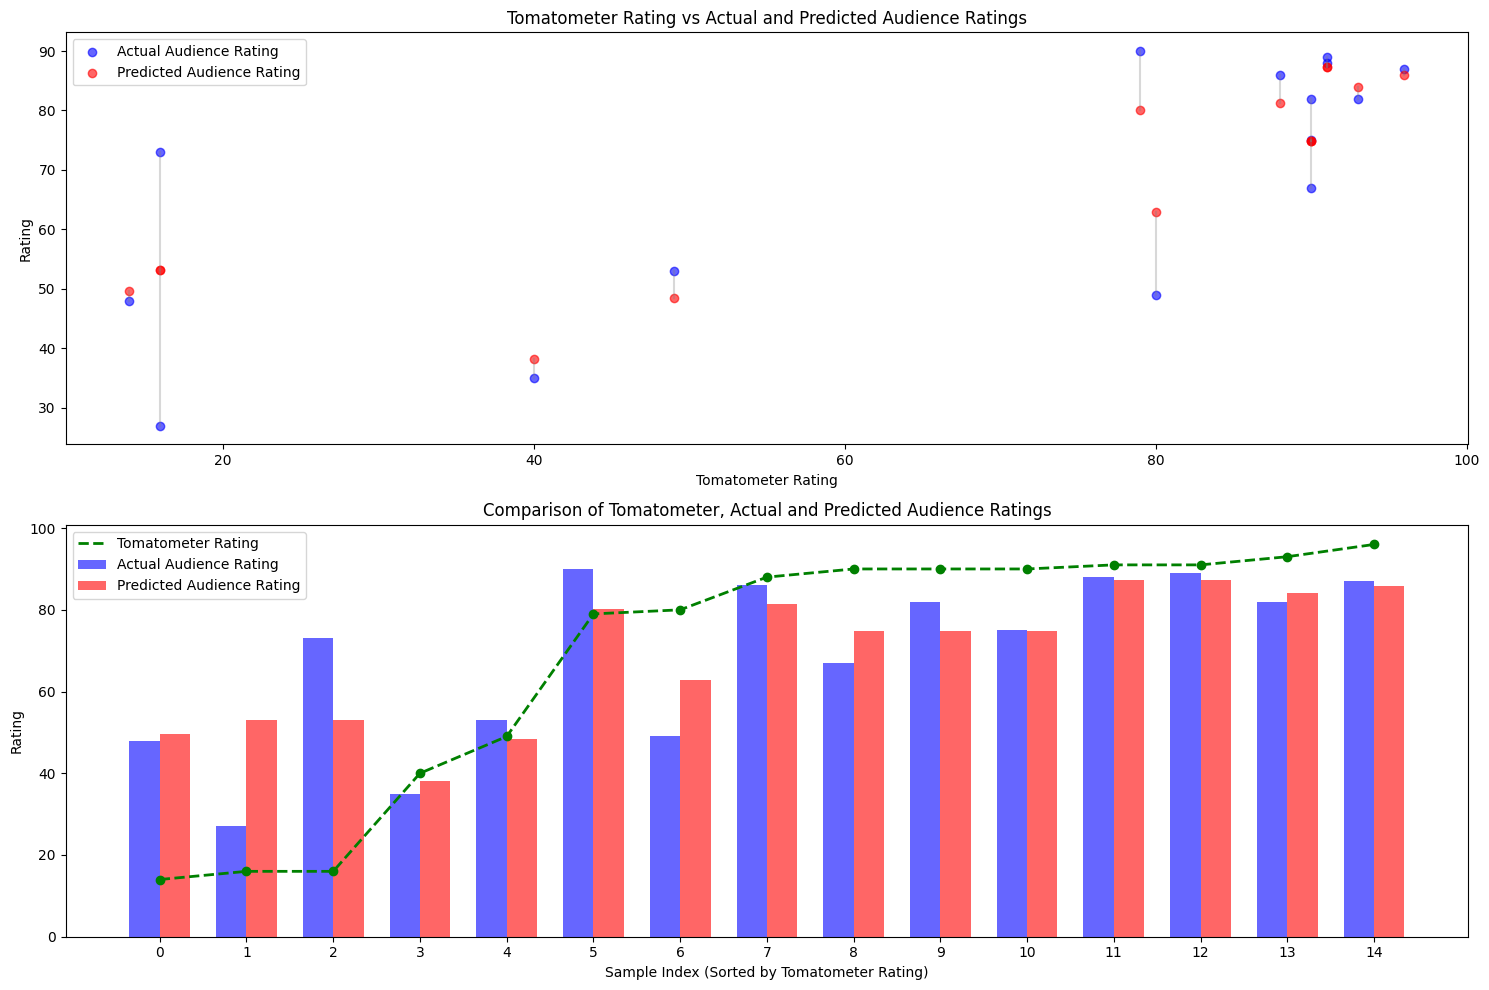


Detailed Comparison (sorted by Tomatometer Rating):

Index | Tomatometer | Actual Audience | Predicted Audience | Difference
----------------------------------------------------------------------
    0 |       14.00 |          48.00 |             49.66 |       1.66
    1 |       16.00 |          27.00 |             53.15 |      26.15
    2 |       16.00 |          73.00 |             53.15 |      19.85
    3 |       40.00 |          35.00 |             38.14 |       3.14
    4 |       49.00 |          53.00 |             48.40 |       4.60
    5 |       79.00 |          90.00 |             80.12 |       9.88
    6 |       80.00 |          49.00 |             62.90 |      13.90
    7 |       88.00 |          86.00 |             81.34 |       4.66
    8 |       90.00 |          67.00 |             74.88 |       7.88
    9 |       90.00 |          82.00 |             74.88 |       7.12
   10 |       90.00 |          75.00 |             74.88 |       0.12
   11 |       91.00 |          88

In [84]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_csv('Rotten_Tomatoes_Movies5.csv', encoding='latin-1', on_bad_lines='skip', quoting=3)
print(f'Initial dataset shape: {df.shape}')

# 2. Clean and prepare the data
df['tomatometer_rating'] = pd.to_numeric(df['tomatometer_rating'], errors='coerce')
df['runtime_in_minutes'] = pd.to_numeric(df['runtime_in_minutes'], errors='coerce')
df['tomatometer_count'] = pd.to_numeric(df['tomatometer_count'], errors='coerce')
df['audience_rating'] = pd.to_numeric(df['audience_rating'], errors='coerce')

# 3. Select Features
features = ['tomatometer_rating']  # Now only using tomatometer_rating to predict audience_rating

# 4. Remove rows with NaN values
df_clean = df.dropna(subset=['audience_rating'] + features)
print(f'Clean dataset shape:{df_clean.shape}')

# 5. Prepare Data for Training
X = df_clean[features]
y = df_clean['audience_rating']

print("Total samples in dataset:", len(df_clean))

# 6. Train Model on whole dataset
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 7. Select 15 random samples for testing
test_indices = np.random.choice(len(df_clean), 15, replace=False)
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# 8. Make predictions on test samples
y_pred = model.predict(X_test)

# 9. Calculate Accuracy
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 10. Print Results
print("\nModel Performance on 15 Test Samples:")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 11. Visualize Results
plt.figure(figsize=(15, 10))

# Plot 1: Tomatometer vs Audience Rating Scatter Plot
plt.subplot(2, 1, 1)
plt.scatter(X_test['tomatometer_rating'], y_test, label='Actual Audience Rating', color='blue', alpha=0.6)
plt.scatter(X_test['tomatometer_rating'], y_pred, label='Predicted Audience Rating', color='red', alpha=0.6)
for i in range(len(X_test)):
    plt.plot([X_test['tomatometer_rating'].iloc[i], X_test['tomatometer_rating'].iloc[i]],
             [y_test.iloc[i], y_pred[i]], 'gray', alpha=0.3)
plt.xlabel('Tomatometer Rating')
plt.ylabel('Rating')
plt.title('Tomatometer Rating vs Actual and Predicted Audience Ratings')
plt.legend()

# Plot 2: Bar chart comparison
indices = np.arange(15)
width = 0.35
plt.subplot(2, 1, 2)

# Sort all values by tomatometer_rating for better visualization
sort_idx = X_test['tomatometer_rating'].argsort()
tomatometer_sorted = X_test['tomatometer_rating'].iloc[sort_idx]
actual_sorted = y_test.iloc[sort_idx]
pred_sorted = y_pred[sort_idx]

plt.bar(indices - width/2, actual_sorted, width, label='Actual Audience Rating', color='blue', alpha=0.6)
plt.bar(indices + width/2, pred_sorted, width, label='Predicted Audience Rating', color='red', alpha=0.6)
plt.plot(indices, tomatometer_sorted, 'g--', label='Tomatometer Rating', linewidth=2)
plt.scatter(indices, tomatometer_sorted, color='green', zorder=5)

plt.xlabel('Sample Index (Sorted by Tomatometer Rating)')
plt.ylabel('Rating')
plt.title('Comparison of Tomatometer, Actual and Predicted Audience Ratings')
plt.legend()
plt.xticks(indices)
plt.tight_layout()
plt.show()

# 12. Print detailed comparison
print("\nDetailed Comparison (sorted by Tomatometer Rating):")
print("\nIndex | Tomatometer | Actual Audience | Predicted Audience | Difference")
print("-" * 70)
for i in range(15):
    tomatometer = tomatometer_sorted.iloc[i]
    actual = actual_sorted.iloc[i]
    pred = pred_sorted[i]
    diff = abs(actual-pred)
    print(f"{i:5d} | {tomatometer:11.2f} | {actual:14.2f} | {pred:17.2f} | {diff:10.2f}")

# 13. Calculate average errors
mean_abs_error = np.mean(abs(y_test - y_pred))
mean_percent_error = np.mean(abs(y_test - y_pred)/y_test * 100)
print(f"\nMean Absolute Error: {mean_abs_error:.2f}")
print(f"Mean Percentage Error: {mean_percent_error:.2f}%")
print(f"Prediction Accuracy: {100 - mean_percent_error:.2f}%")